## IBM Data Science Capstone Project 
### Created by Cecilia Souto Lage
#### January 2021

Hello, Dear Reader!

Thank you for taking the time to check this notebook. It was created to display an awesome project done as a prerequisite for the obtention of the IBM Data Science Certificate.
I am going to cluster the neighborhoods in Toronto and all the necessary steps to do it will be shown. I am also going to evaluate the implemented k-means algorithm.

I hope you enjoy it ;)

#### 1. Libraries

The first step is to install and donwload the libraries and packages we are going to use such as:
<ol>
  <li>Pandas</li>
  <li>Numpy</li>
  <li>Opencage</li>
  <li>Folium</li>
  <li>Requests</li>
  <li>Json</li>
  <li>Sklearn</li>
  <li>Matplotlib</li>
</ol>

In [2]:
# Import the pandas library as pd
import pandas as pd
# Import the Numpy library as np
import numpy as np
# Let`s rock geocoding with Opencage
!pip install opencage 
# Let`s plot some cool maps with folium
!pip install folium
import folium # map rendering library
# Library to handle requests
import requests 
# Let`s tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
# Library to handle JSON files
import json 
# Import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Print Hello statement
print('The libraries were loaded!')

     |████████████████████████████████| 94 kB 5.3 MB/s  eta 0:00:01
The libraries were loaded!


#### 2. Data of Toronto neighborhoods

Now let`s get the data about Toronto neighborhoods from Wikipedia and save it in a data frame.

In [3]:
# 1. Get the table with Toronto info from the web
dfto = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

# 2. Ignore cells with a borough that is Not assigned
dfto = dfto.loc[dfto['Borough']!="Not assigned"]

# 3. Print the number of cells of the dataframe
print('The dataframe has {} rows.'.format(dfto.shape[0]))

# 4. Check the dataframe so far
print('The datafrane so far looks like this:')
dfto.head()

The dataframe has 103 rows.
The datafrane so far looks like this:


,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
# Geocoding each address from our dataset

# 1. Creating column with full address info
dfto['Address']=dfto['Postal Code'] + ',' + dfto['Borough']  + ',' + 'Toronto'
# 2. Import OpenCageGeocode
from opencage.geocoder import OpenCageGeocode
# 3. Enter your key info
key = key_csl
# 4. Convert address column to list
addresses = dfto['Address'].values.tolist()
# 5. Connect to OpenCageGeocode API
geocoder = OpenCageGeocode(key)
# 6. Create lists to store latitude/longitude values
latitudes = []
longitudes = []
# 7. Implement a loop to get lat/lng values for all addresses
for address in addresses: 
    result = geocoder.geocode(address, no_annotations="1")  
    
    if result and len(result):  
        longitude = result[0]["geometry"]["lng"]  
        latitude = result[0]["geometry"]["lat"] 
    else:  
        longitude = "N/A"  
        latitude = "N/A"  
    
    latitudes.append(latitude) 
    longitudes.append(longitude)

Let`s add the latitude and longitude values of each postal code in our data frame and check it out:

In [7]:
# 8. Append lat/lng values to dataframe
dfto['Latitude'] = latitudes
dfto['Longitude'] = longitudes
# 9. Check dataframe
dfto.head()

,Postal Code,Borough,Neighbourhood,Address,Latitude,Longitude
2,M3A,North York,Parkwoods,"M3A,North York,Toronto",43.754326,-79.449117
3,M4A,North York,Victoria Village,"M4A,North York,Toronto",43.754326,-79.449117
4,M5A,Downtown Toronto,"Regent Park, Harbourfront","M5A,Downtown Toronto,Toronto",43.654174,-79.380812
5,M6A,North York,"Lawrence Manor, Lawrence Heights","M6A,North York,Toronto",43.754326,-79.449117
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government","M7A,Downtown Toronto,Toronto",43.656322,-79.380916


#### 3. Map of Toronto

We are going to create a map of Torornto with neighborhoods superimposed on top using the Folium library.

In [8]:
# 1. Get the latitude and longitude values of Toronto
result_T = geocoder.geocode('Toronto', no_annotations="1")  
latitude_T = result_T[0]["geometry"]["lat"]
longitude_T = result_T[0]["geometry"]["lng"]

# 2. Create a map of Toronto with neighborhoods superimposed on top
map_toronto = folium.Map(location=[latitude_T, longitude_T], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dfto['Latitude'], dfto['Longitude'], dfto['Borough'], dfto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### 4. Foursquare

Let`s access the Foursquare API to explore the neighborhoods in Toronto.

In [54]:
# 1. Define Foursquare Credentials and Version
# @hidden_cell
CLIENT_ID = 
CLIENT_SECRET = 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [22]:
# 10.Let's explore the first neighborhood in our dataframe
#dfto.loc[2, 'Neighbourhood']

#neighborhood_latitude = dfto.loc[2, 'Latitude'] # neighborhood latitude value
#neighborhood_longitude = dfto.loc[2, 'Longitude'] # neighborhood longitude value

#neighborhood_name = dfto.loc[2, 'Neighbourhood'] # neighborhood name

#print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               #neighborhood_latitude, 
                                                               #neighborhood_longitude))

In [23]:
#radius = 500
#limit = 100
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    #CLIENT_ID, 
    #CLIENT_SECRET, 
    #VERSION, 
    #neighborhood_latitude, 
    #neighborhood_longitude, 
    #radius, 
    #LIMIT)
#url # display URL

In [24]:
#results = requests.get(url).json()
#results

We are going to write a function to extract the category of a venue returned by Foursqure.

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
#venues = results['response']['groups'][0]['items']
    
#nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
#filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
#nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#nearby_venues.head()

In [27]:
#print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

Let's create a function to get the venue category of each venue in each neighborhood of our dataset.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now let`s call the function and print the new dataframw with the venues of Toronto.

In [12]:
toronto_venues = getNearbyVenues(names=dfto['Neighbourhood'],
                                   latitudes=dfto['Latitude'],
                                   longitudes=dfto['Longitude']
                                  )

#### 5. Toronto venues

Let`s explore the dataframe with Toronto venues.

In [13]:
print('The shape of the dataframe with Toronto venues is: ',toronto_venues.shape)
print('The datafrane looks like this:')
toronto_venues.head()

The shape of the dataframe with Toronto venues is:  (2809, 7)
The datafrane looks like this:


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.754326,-79.449117,Grill Gate,43.753123,-79.451690,Mediterranean Restaurant
1,Parkwoods,43.754326,-79.449117,Orly Restaurant & Grill,43.754493,-79.443507,Middle Eastern Restaurant
2,Parkwoods,43.754326,-79.449117,Tim Hortons,43.754767,-79.443250,Coffee Shop
3,Parkwoods,43.754326,-79.449117,Domino's Pizza,43.753127,-79.450926,Pizza Place
4,Victoria Village,43.754326,-79.449117,Grill Gate,43.753123,-79.451690,Mediterranean Restaurant


Let's check how many venues were returned for each neighborhood:


In [15]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,11,11,11,11,11,11
"Alderwood, Long Branch",15,15,15,15,15,15
"Bathurst Manor, Wilson Heights, Downsview North",11,11,11,11,11,11
Bayview Village,8,8,8,8,8,8
"Bedford Park, Lawrence Manor East",11,11,11,11,11,11
...,...,...,...,...,...,...
"Willowdale, Willowdale West",4,4,4,4,4,4
Woburn,4,4,4,4,4,4
Woodbine Heights,11,11,11,11,11,11


Let's find out how many unique categories can be curated from all the returned venues.

In [16]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 192 uniques categories.


#### 6. Analyzing Toronto`s neighborhoods

In [18]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,...,Trail,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,...,Trail,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0


Let's print each neighborhood along with the top 5 most common venues:

In [23]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                venue  freq
0  Italian Restaurant  0.18
1         Coffee Shop  0.09
2           Gastropub  0.09
3              Garden  0.09
4         Dry Cleaner  0.09


----Alderwood, Long Branch----
                       venue  freq
0                Pizza Place  0.13
1                Coffee Shop  0.13
2                       Park  0.13
3  Middle Eastern Restaurant  0.07
4                Bus Station  0.07


----Bathurst Manor, Wilson Heights, Downsview North----
                venue  freq
0  Italian Restaurant  0.18
1         Coffee Shop  0.09
2           Gastropub  0.09
3              Garden  0.09
4         Dry Cleaner  0.09


----Bayview Village----
                   venue  freq
0  Vietnamese Restaurant  0.38
1   Fast Food Restaurant  0.12
2   Caribbean Restaurant  0.12
3               Tea Room  0.12
4            Coffee Shop  0.12


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.18
1         Coffee Shop  0.09
2    

                venue  freq
0         Coffee Shop  0.09
1      Clothing Store  0.07
2               Hotel  0.04
3  Seafood Restaurant  0.03
4          Restaurant  0.03


----New Toronto, Mimico South, Humber Bay Shores----
                venue  freq
0  Italian Restaurant  0.18
1         Coffee Shop  0.09
2           Gastropub  0.09
3              Garden  0.09
4         Dry Cleaner  0.09


----North Park, Maple Leaf Park, Upwood Park----
                       venue  freq
0                Pizza Place  0.25
1  Middle Eastern Restaurant  0.25
2   Mediterranean Restaurant  0.25
3                Coffee Shop  0.25
4                Yoga Studio  0.00


----North Toronto West, Lawrence Park----
                venue  freq
0         Coffee Shop  0.11
1  Italian Restaurant  0.08
2    Sushi Restaurant  0.06
3       Grocery Store  0.06
4     Thai Restaurant  0.06


----Northwest, West Humber - Clairville----
                       venue  freq
0                Pizza Place  0.13
1                Cof

Let's put that into a _pandas_ dataframe.

First, let's write a function to sort the venues in descending order.


In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [29]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
1,"Alderwood, Long Branch",Pizza Place,Park,Coffee Shop,Bus Station,Concert Hall
2,"Bathurst Manor, Wilson Heights, Downsview North",Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
3,Bayview Village,Vietnamese Restaurant,Caribbean Restaurant,Coffee Shop,Tea Room,Sandwich Place
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner


#### 7. Cluster Neighborhoods


Ok, folks... Now we are ready to finally run k-means algorithm in our neighbourhoods.
Shall we?

In [31]:
# 1. Set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# 2. Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# 3. Check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]

Hoooray!!! We did it! Let`s add the cluster labels to our data frame and check it out:

In [41]:
# 4. Add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dfto

# 5. Merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,M3A,North York,Parkwoods,"M3A,North York,Toronto",43.754326,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
3,M4A,North York,Victoria Village,"M4A,North York,Toronto",43.754326,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
4,M5A,Downtown Toronto,"Regent Park, Harbourfront","M5A,Downtown Toronto,Toronto",43.654174,-79.380812,2.0,Coffee Shop,Clothing Store,Seafood Restaurant,Sandwich Place,Diner
5,M6A,North York,"Lawrence Manor, Lawrence Heights","M6A,North York,Toronto",43.754326,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government","M7A,Downtown Toronto,Toronto",43.656322,-79.380916,2.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar


Let`s convert cluster labels to int types so we can plot some awesome stuff !

In [44]:
toronto_merged.dropna(subset = ['Cluster Labels'], inplace=True)
toronto_merged['Cluster Labels'].astype(int)

2      0
3      0
4      2
5      0
6      2
      ..
160    2
165    1
168    4
169    2
178    2
Name: Cluster Labels, Length: 102, dtype: int64

Toronto`s map with neighborhoods clustered...

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
3,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
5,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
14,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
73,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
77,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
80,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
100,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner
109,North York,-79.449117,0.0,Middle Eastern Restaurant,Pizza Place,Mediterranean Restaurant,Coffee Shop,Dry Cleaner


The dataframe of each cluster is shown below so we can see which venues make a cluster unique.

In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,North York,-79.449117,1.0,Italian Restaurant,Coffee Shop,Pizza Place,Café,Gastropub
20,North York,-79.416300,1.0,Italian Restaurant,Coffee Shop,Pizza Place,Café,Gastropub
21,East York,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
22,Downtown Toronto,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
23,York,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
31,Downtown Toronto,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
45,Scarborough,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
46,North York,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
47,North York,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner
48,East York,-79.416300,1.0,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Café,Dry Cleaner


In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Downtown Toronto,-79.380812,2.0,Coffee Shop,Clothing Store,Seafood Restaurant,Sandwich Place,Diner
6,Downtown Toronto,-79.380916,2.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar
8,Etobicoke,-79.565633,2.0,Convenience Store,Coffee Shop,Skating Rink,Café,Restaurant
9,Scarborough,-79.257648,2.0,Clothing Store,Coffee Shop,Shoe Store,Department Store,Pharmacy
13,Downtown Toronto,-79.380916,2.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar
...,...,...,...,...,...,...,...,...
156,Downtown Toronto,-79.380916,2.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar
157,Downtown Toronto,-79.380916,2.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar
160,Etobicoke,-79.565633,2.0,Convenience Store,Coffee Shop,Skating Rink,Café,Restaurant
169,Etobicoke,-79.489846,2.0,Coffee Shop,Gym,Café,Park,Fried Chicken Joint


In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,East York,-79.332520,3.0,Park,Pub,Pastry Shop,Liquor Store,Intersection
36,Scarborough,-79.221898,3.0,Supplement Shop,Indian Restaurant,Coffee Shop,Park,Xinjiang Restaurant
55,North York,-79.366185,3.0,Park,Pharmacy,Thai Restaurant,Coffee Shop,Middle Eastern Restaurant
75,East Toronto,-79.395035,3.0,Sculpture Garden,Performing Arts Venue,Park,Music Venue,Diner
104,West Toronto,-79.464511,3.0,Park,Residential Building (Apartment / Condo),Convenience Store,Xinjiang Restaurant,Distribution Center


In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
168,East Toronto,-80.598961,4.0,Bar,Ice Cream Shop,Restaurant,Stadium,Cupcake Shop


We can also rename the clusters:

<ol>
  <li>Cluster 0 = Restaurants and dry cleaner</li>
  <li>Cluster 1 = Italian food lovers</li>
  <li>Cluster 2 = Coffeholics</li>
  <li>Cluster 3 = Parks</li>
  <li>Cluster 4 = Sports fans</li>
</ol>

#### 8. K-means evaluation

And last but not least, we are going to check if k=5 was a good choice with the elbow curve method.

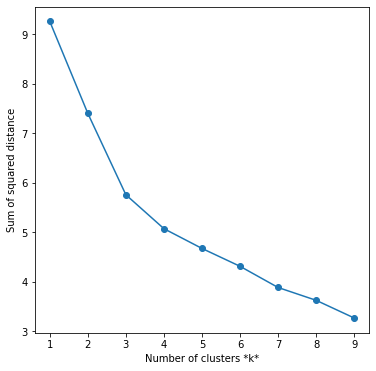

In [52]:
### Evaluate kmeans performance
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(toronto_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

That`s it for today!
I know it was a long journey and I appreciate your time!
Thank you and I hope to see in my next cool project!